<a href="https://colab.research.google.com/github/toche7/MDS/blob/main/DemographicDataAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Demographic Data Analysis

### อ่านจาก Google Sheet

In [ ]:
import pandas as pd
from google.colab import auth 
auth.authenticate_user()

In [ ]:
import gspread
from oauth2client.client import GoogleCredentials

In [ ]:
gc = gspread.authorize(GoogleCredentials.get_application_default())
wb = gc.open('Demographic Data Survey (Responses)')
worksheet = wb.worksheet('Sheet2')

In [ ]:
rows = worksheet.get_all_records()

In [ ]:
print(rows)

[{'Gender': 'F', 'Age': 25, 'Weight': 39, 'Height': 156}, {'Gender': 'M', 'Age': 40, 'Weight': 73, 'Height': 178}, {'Gender': 'F', 'Age': 28, 'Weight': 60, 'Height': 148}, {'Gender': 'F', 'Age': 27, 'Weight': 53.7, 'Height': 158}, {'Gender': 'M', 'Age': 24, 'Weight': 57, 'Height': 166}, {'Gender': 'M', 'Age': 50, 'Weight': 107, 'Height': 182}, {'Gender': 'F', 'Age': 28, 'Weight': 47, 'Height': 163}, {'Gender': 'F', 'Age': 23, 'Weight': 43, 'Height': 153}, {'Gender': 'M', 'Age': 33, 'Weight': 81, 'Height': 173}, {'Gender': 'F', 'Age': 30, 'Weight': 75, 'Height': 163}, {'Gender': 'M', 'Age': 27, 'Weight': 65, 'Height': 175}, {'Gender': 'F', 'Age': 35, 'Weight': 60, 'Height': 160}, {'Gender': 'F', 'Age': 46, 'Weight': 54, 'Height': 157}, {'Gender': 'F', 'Age': 27, 'Weight': 43, 'Height': 153}, {'Gender': 'F', 'Age': 34, 'Weight': 67, 'Height': 163}, {'Gender': 'F', 'Age': 24, 'Weight': 69, 'Height': 155}, {'Gender': 'M', 'Age': 50, 'Weight': 70, 'Height': 173}, {'Gender': 'F', 'Age': 38, 

In [ ]:
df = pd.DataFrame.from_records(rows)

In [ ]:
df.head()

,Gender,Age,Weight,Height
0,F,25,39.0,156
1,M,40,73.0,178
2,F,28,60.0,148
3,F,27,53.7,158
4,M,24,57.0,166


In [ ]:
df.dtypes

Gender     object
Age         int64
Weight    float64
Height      int64
dtype: object

In [ ]:
df['Gender'] = df['Gender'].astype('category')

In [ ]:
df.dtypes

Gender    category
Age          int64
Weight     float64
Height       int64
dtype: object

# Data Visualization 

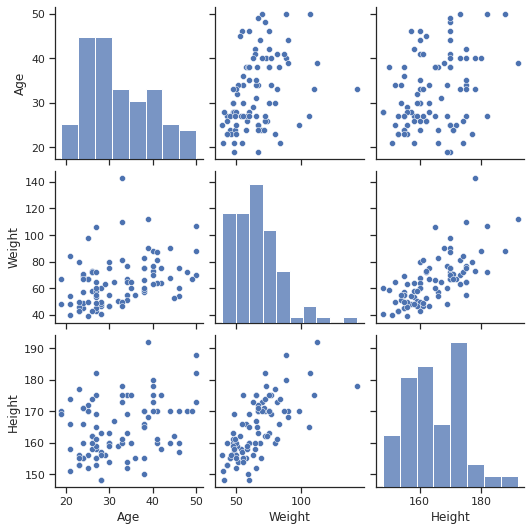

In [ ]:
import seaborn as sns
sns.set_theme(style = 'ticks')
sns.pairplot(df)

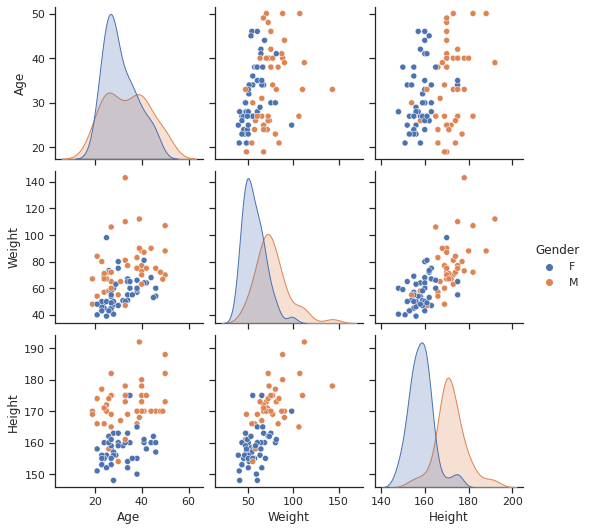

In [ ]:
sns.pairplot(df, hue = 'Gender')

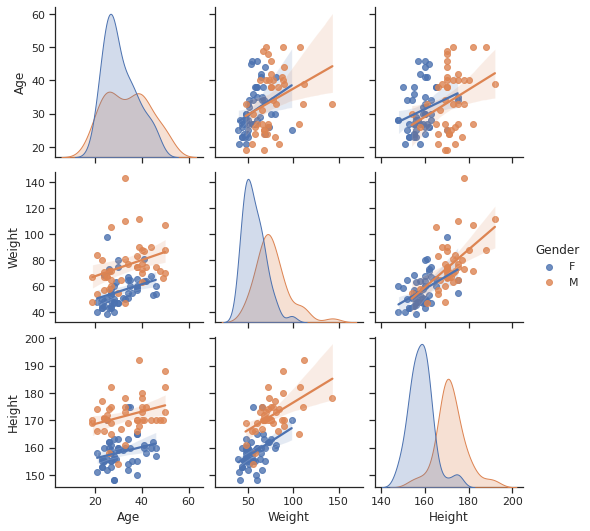

In [ ]:
sns.pairplot(df, hue = 'Gender', kind= 'reg')

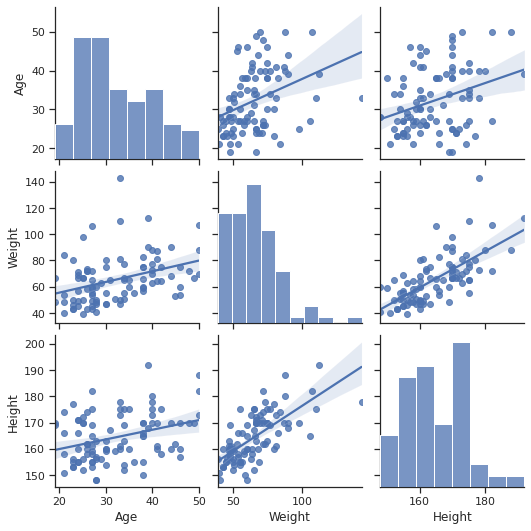

In [ ]:
sns.pairplot(df,  kind= 'reg')

#Regression Analysis

In [ ]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


In [ ]:
generalAttr = ['Height']
X = df[generalAttr]
y = df.Weight

In [ ]:
X.head()

,Height
0,156
1,178
2,148
3,158
4,166


In [ ]:
y.head()

0    39.0
1    73.0
2    60.0
3    53.7
4    57.0
Name: Weight, dtype: float64

In [ ]:
X_train, X_test, y_train, y_test  = train_test_split(X,y,test_size = 0.3, random_state = 1)

In [ ]:
X_train.head()

,Height
85,169
52,148
35,170
41,170
81,162


In [ ]:
X_test.head()

,Height
59,156
74,169
44,177
56,161
88,174


In [ ]:
X_test.size

28

In [ ]:
regr = linear_model.LinearRegression()

In [ ]:
regr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
regr.coef_

array([1.40889553])

In [ ]:
y_pred = regr.predict(X_test)

In [ ]:
mean_squared_error(y_test,y_pred)

182.39006859225455

In [ ]:
r2_score(y_test, y_pred)

0.4311368529563785

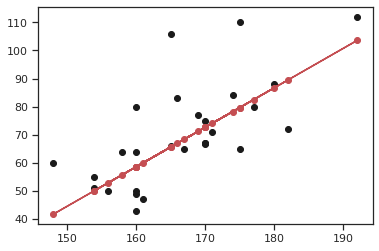

In [ ]:
plt.scatter(X_test, y_test, color ='k')
plt.plot(X_test,y_pred,'-or')